# Feature importance

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df_trn = pd.read_csv('../data/training_le.csv')
df_trn.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,36122,3956,886,4405,5,9,0,2,1000.0,1000,2018-11-15 02:18:49,2,0
1,15641,4840,3828,4405,3,5,2,1,-20.0,20,2018-11-15 02:19:08,2,0
2,53940,4228,221,4682,5,0,0,2,500.0,500,2018-11-15 02:44:21,2,0
3,102362,647,2184,987,0,20,9,2,20000.0,21800,2018-11-15 03:32:55,2,0
4,38779,4840,3828,987,3,5,2,1,-644.0,644,2018-11-15 03:34:21,2,0


In [3]:
df_trn_cut = df_trn.drop(columns=['TransactionStartTime'], axis=1)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
def scaleColumns(data, cols_to_scale, scaler):
    for col in cols_to_scale:
        data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[col])))
    return data

In [6]:
df_trn_cut = scaleColumns(df_trn_cut, ['Amount'], MinMaxScaler())

In [7]:
X_trn_cut = df_trn_cut.drop(columns=['FraudResult'], axis=1)
y_trn_cut = df_trn_cut['FraudResult']

## Univariate Selection $\chi^2$

In [9]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_trn_cut, y_trn_cut)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_trn_cut.columns)

In [10]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
9             Value  4.704480e+10
1         AccountId  4.739727e+04
2    SubscriptionId  6.255373e+03
3        CustomerId  1.726118e+03
5         ProductId  1.300673e+03
0           BatchId  1.041789e+03
6   ProductCategory  1.596555e+02
4        ProviderId  1.209039e+02
8            Amount  4.125339e+01
10  PricingStrategy  1.990936e+01


## Feature Importance with Tree Based Classifiers

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [14]:
model = ExtraTreesClassifier()
model.fit(X_trn_cut, y_trn_cut)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.0598156  0.03987884 0.03181865 0.04262064 0.02056491 0.01052635
 0.01323466 0.00266652 0.28584361 0.47195041 0.0210798 ]


/home/abogatyrov/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


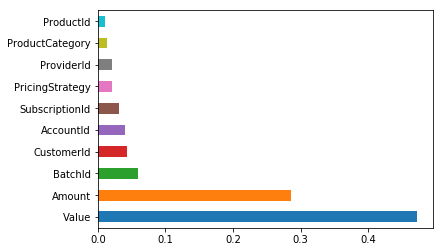

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_trn_cut.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

In [19]:
import seaborn as sns

In [20]:
#get correlations of each features in dataset
corrmat = X_trn_cut.corr()
top_corr_features = corrmat.index

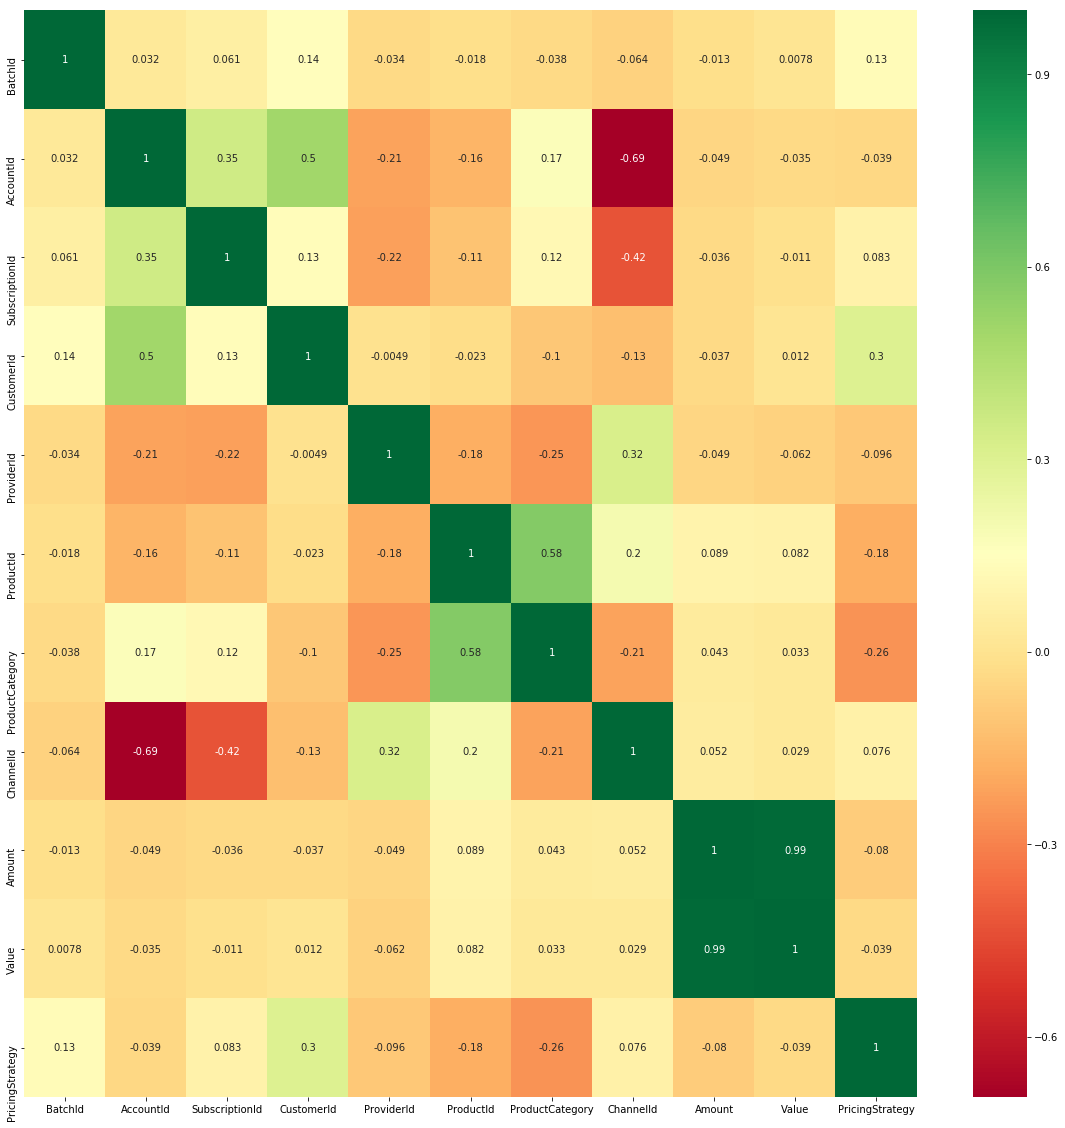

In [22]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X_trn_cut[top_corr_features].corr(), annot=True, cmap="RdYlGn")